# Demo 7: Pruning

We usually use pruning to make neural networks sparser hence more efficient and more interpretable. KANs provide two ways of pruning: automatic pruning, and manual pruning.

## Pruning nodes

train loss: 4.42e-02 | test loss: 4.54e-02 | reg: 5.27e+00 : 100%|██| 20/20 [00:03<00:00,  6.36it/s]


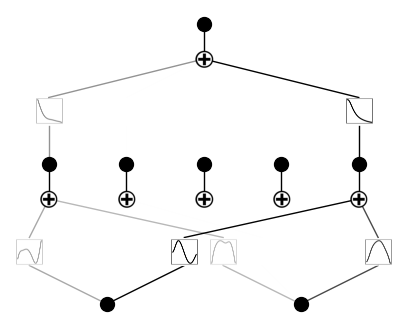

In [3]:
from kan import *
# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[2,5,1], grid=5, k=3, seed=1)

# create dataset f(x,y) = exp(sin(pi*x)+y^2)
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=2)
dataset['train_input'].shape, dataset['train_label'].shape

# train the model
model.fit(dataset, opt="LBFGS", steps=20, lamb=0.01);
model(dataset['train_input'])
model.plot()

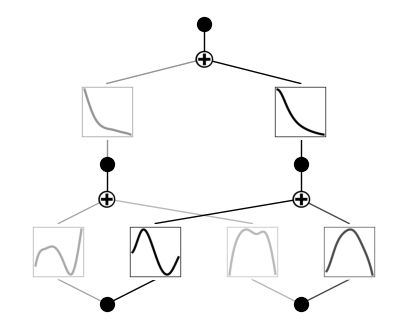

In [4]:
mode = 'auto'

if mode == 'auto':
    # automatic
    model = model.prune_node(threshold=1e-2) # by default the threshold is 1e-2
    model.plot()
elif mode == 'manual':
    # manual
    model = model.prune_node(active_neurons_id=[[0]])

## Pruning Edges

train loss: 5.03e-02 | test loss: 5.11e-02 | reg: 6.26e+00 : 100%|████| 6/6 [00:01<00:00,  5.63it/s]


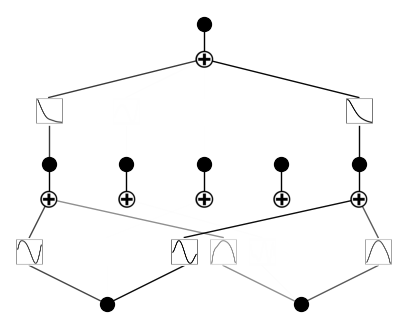

In [5]:
from kan import *
# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[2,5,1], grid=5, k=3, seed=1)

# create dataset f(x,y) = exp(sin(pi*x)+y^2)
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=2)
dataset['train_input'].shape, dataset['train_label'].shape

# train the model
model.fit(dataset, opt="LBFGS", steps=6, lamb=0.01);
model(dataset['train_input'])
model.plot()

In [6]:
model.prune_edge()

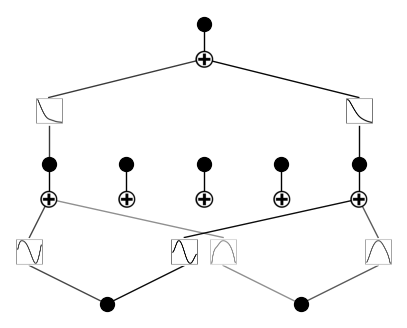

In [7]:
model.plot()

## Prune nodes and edges together

just use model.prune()

train loss: 4.42e-02 | test loss: 4.54e-02 | reg: 5.27e+00 : 100%|██| 20/20 [00:03<00:00,  6.36it/s]


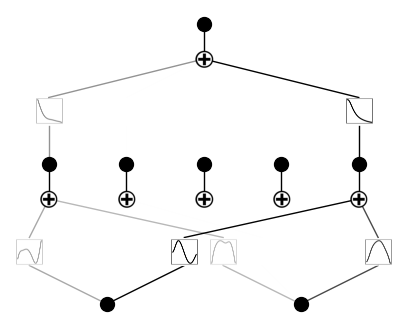

In [8]:
from kan import *
# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[2,5,1], grid=5, k=3, seed=1)

# create dataset f(x,y) = exp(sin(pi*x)+y^2)
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=2)
dataset['train_input'].shape, dataset['train_label'].shape

# train the model
model.fit(dataset, opt="LBFGS", steps=20, lamb=0.01);
model(dataset['train_input'])
model.plot()

In [10]:
model = model.prune()
model.plot()

FileNotFoundError: [Errno 2] No such file or directory: './model/history.txt'